In [1]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

from utils.time_utils import TimeProcessorConv2d

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_conv2d = TimeProcessorConv2d(base_dir)
df = time_processor_conv2d.get_data(sample_rate=0.5)

0it [00:00, ?it/s]

34it [00:09,  2.22it/s]

< 0 found in file time.32.1024.0.pkl


44it [00:13,  2.35it/s]

< 0 found in file time.128.512.0.pkl


46it [00:14,  2.26it/s]

< 0 found in file time.128.1024.0.pkl


54it [00:18,  2.59it/s]

< 0 found in file time.512.128.0.pkl


56it [00:19,  2.30it/s]

< 0 found in file time.512.512.0.pkl


58it [00:20,  1.93it/s]

< 0 found in file time.512.1024.0.pkl


59it [00:21,  1.65it/s]

< 0 found in file time.512.1024.1.pkl


64it [00:22,  2.85it/s]

< 0 found in file time.1024.32.0.pkl


66it [00:23,  2.37it/s]

< 0 found in file time.1024.128.0.pkl


68it [00:24,  2.21it/s]

< 0 found in file time.1024.512.0.pkl


69it [00:25,  1.78it/s]

< 0 found in file time.1024.512.1.pkl


70it [00:26,  2.09it/s]

< 0 found in file time.1024.1024.0.pkl


71it [00:26,  1.75it/s]

< 0 found in file time.1024.1024.1.pkl


72it [00:27,  2.65it/s]
/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/utils/time_utils.py:297: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs, axis=0, ignore_index=True)


In [3]:
df.query("time < 0")

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
123366,16.32.128.32.1024.4096.128.3.7.1.1.0,-4.0,16,32,128,32,1024,4096,128,3,7,1,1,0,2.308974e+04
123553,16.32.1024.32.1024.4096.1024.3.5.1.1.0,-4.0,16,32,1024,32,1024,4096,1024,3,5,1,1,0,1.319414e+05
123650,b16.32.128.32.1024.4096.128.7.5.1.1.0,-4.0,b16,32,128,32,1024,4096,128,7,5,1,1,0,3.848291e+04
124756,16.32.512.32.1024.4096.512.7.3.1.1.0,-4.0,16,32,512,32,1024,4096,512,7,3,1,1,0,9.235898e+04
124932,32.32.1024.32.1024.4096.1024.5.5.1.1.0,-4.0,32,32,1024,32,1024,4096,1024,5,5,1,1,0,2.199023e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342545,32.2.3072.1024.1024.3072.256.5.5.1.1.1,-1.0,32,2,3072,1024,1024,3072,256,5,5,1,1,1,9.895605e+05
342546,16.16.512.1024.1024.512.512.5.3.1.1.1,-1.0,16,16,512,1024,1024,512,512,5,3,1,1,1,1.319414e+05
342547,16.2.1024.1024.1024.1024.1024.5.3.1.1.1,-1.0,16,2,1024,1024,1024,1024,1024,5,3,1,1,1,6.597070e+04
342548,32.32.4096.1024.1024.4096.128.3.5.1.1.1,-1.0,32,32,4096,1024,1024,4096,128,3,5,1,1,1,1.688850e+07


In [4]:
df["time"].isna().sum()

12457

In [5]:
df = df.query("time >= 0").dropna()

In [6]:
df

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
0,32.32.2048.8.8.1024.1024.7.7.1.1.0,0.055296,32,32,2048,8,8,1024,1024,7,7,1,1,0,420.906795
1,16.8.32.8.8.2048.1.7.7.1.1.0,0.039936,16,8,32,8,8,2048,1,7,7,1,1,0,3.288334
2,16.2.32.8.8.128.1.7.3.1.1.0,0.032768,16,2,32,8,8,128,1,7,3,1,1,0,0.022020
3,16.2.32.8.8.2048.1.7.7.1.1.0,0.038912,16,2,32,8,8,2048,1,7,7,1,1,0,0.822084
4,b16.2.512.8.8.128.64.3.5.1.1.0,0.032768,b16,2,512,8,8,128,64,3,5,1,1,0,0.251658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339485,b16.2.256.1024.1024.256.1.3.3.1.1.1,12.361728,b16,2,256,1024,1024,256,1,3,3,1,1,1,2473.901162
339970,b16.2.16.1024.1024.16.1.3.3.1.1.1,0.758784,b16,2,16,1024,1024,16,1,3,3,1,1,1,9.663676
340591,b16.2.1536.1024.1024.1536.1.3.3.1.1.1,354.409485,b16,2,1536,1024,1024,1536,1,3,3,1,1,1,89060.441850
341498,b16.2.4.1024.1024.4.1.3.3.1.1.1,0.768512,b16,2,4,1024,1024,4,1,3,3,1,1,1,0.603980


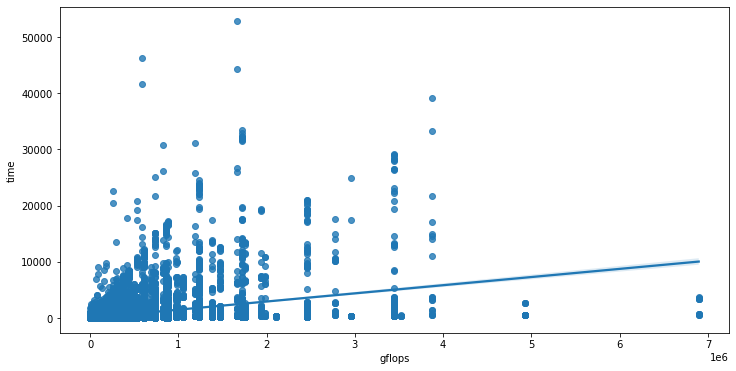

In [7]:
plt.figure(figsize=(12,6))
sns.regplot(x="gflops", y="time", data=df)
plt.show()

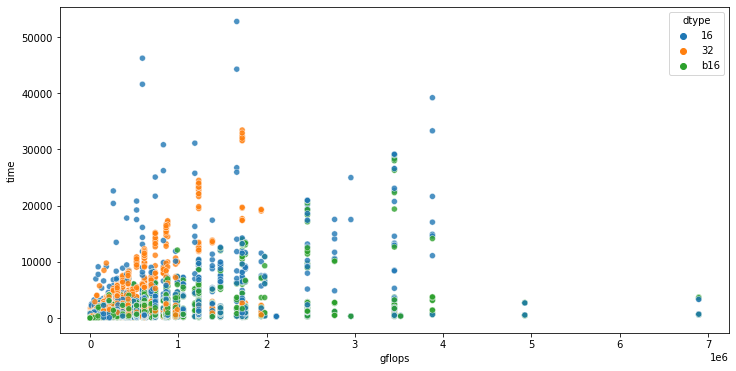

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.8, data=df)
plt.show()

32---------------------------------------


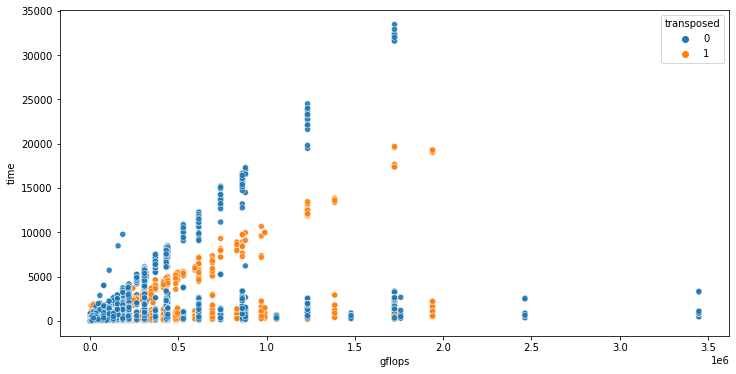

b16---------------------------------------


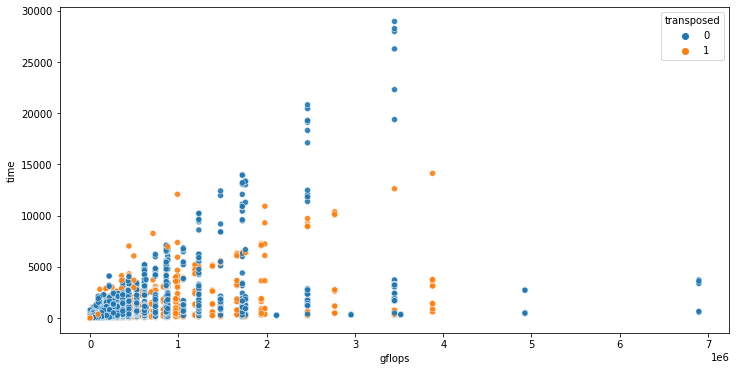

16---------------------------------------


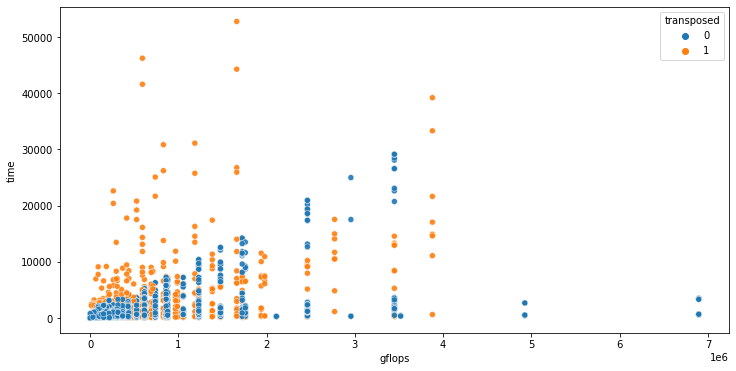

In [9]:
for dtype in ["32", "b16", "16"]:
    print(f"{dtype}---------------------------------------")
    plt.figure(figsize=(12,6))
    sns.scatterplot(x="gflops", y="time", hue="transposed", alpha=0.9, data=df.query(f"dtype == '{dtype}'"))
    plt.show()

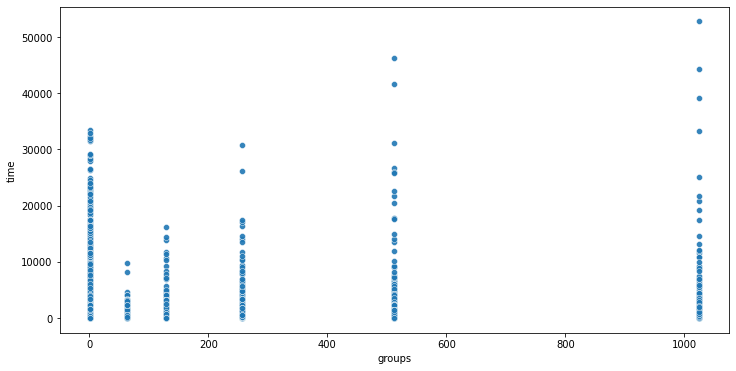

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="groups", y="time", alpha=0.9, data=df)
plt.show()

# Filtering Outliers

Unclear why these have outliers

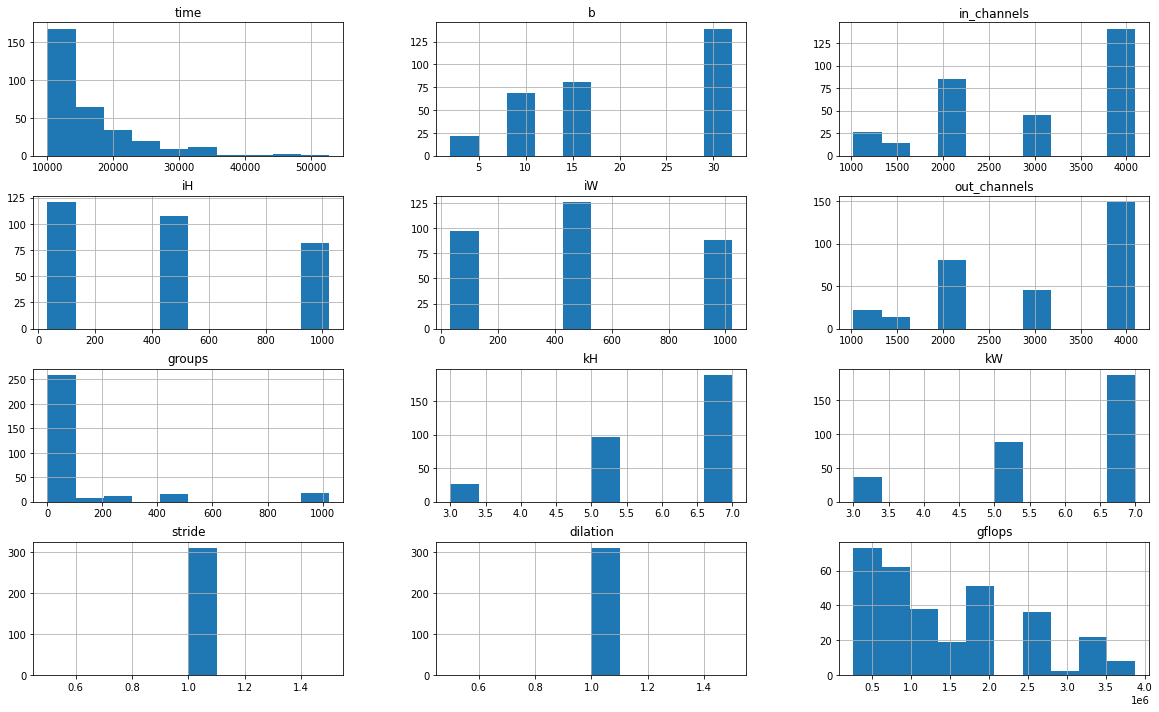

In [11]:
df.query("time > 10000").hist(figsize=(20, 12))
plt.show()

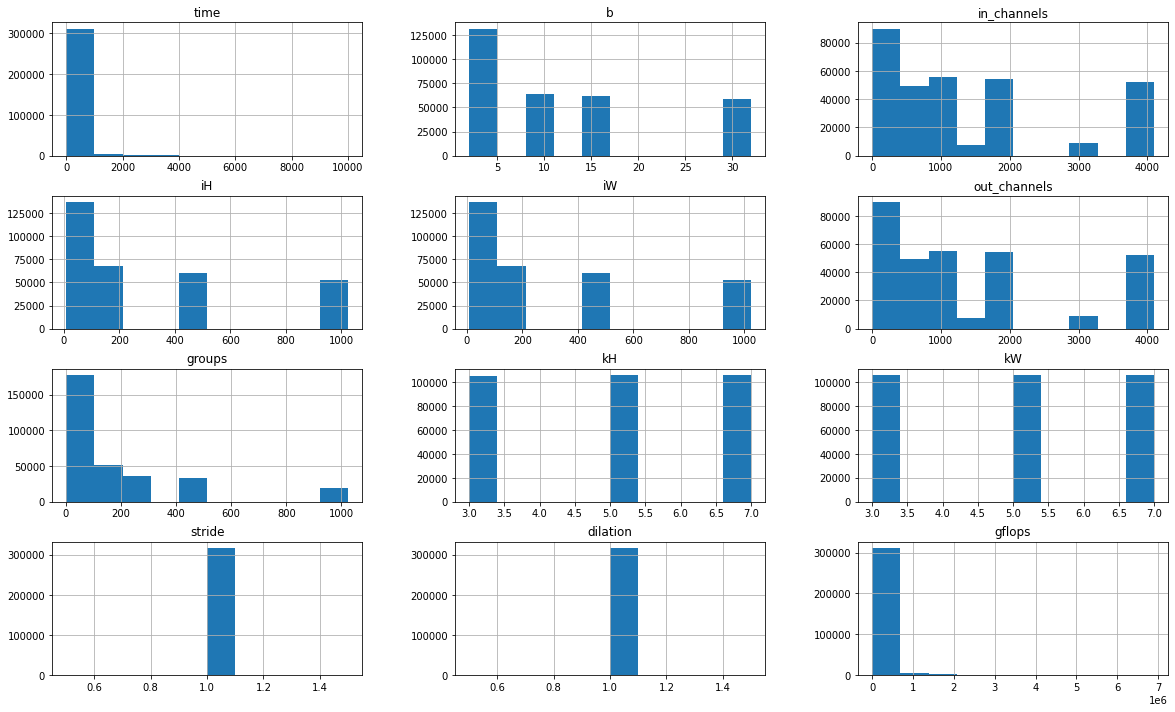

In [12]:
df.query("time < 10000").hist(figsize=(20, 12))
plt.show()

In [13]:
"""
TODO: convert to logscale for time?
"""

df.query("time > 10000")

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
123363,32.32.4096.32.1024.4096.1.7.5.1.1.0,19473.542969,32,32,4096,32,1024,4096,1,7,5,1,1,0,1.231453e+06
125878,32.32.4096.32.1024.4096.1.5.7.1.1.0,19810.384766,32,32,4096,32,1024,4096,1,5,7,1,1,0,1.231453e+06
126595,32.16.4096.32.1024.4096.1.7.7.1.1.0,13206.764648,32,16,4096,32,1024,4096,1,7,7,1,1,0,8.620171e+05
130028,b16.32.4096.32.1024.4096.1.7.7.1.1.0,12075.002441,b16,32,4096,32,1024,4096,1,7,7,1,1,0,1.724034e+06
133211,32.32.4096.32.1024.4096.1.5.5.1.1.0,14482.869141,32,32,4096,32,1024,4096,1,5,5,1,1,0,8.796093e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324575,32.4.2048.1024.512.4096.1.7.5.1.1.0,24011.033203,32,4,2048,1024,512,4096,1,7,5,1,1,0,1.231453e+06
324689,32.4.1024.1024.512.4096.1.5.7.1.1.0,11278.863281,32,4,1024,1024,512,4096,1,5,7,1,1,0,6.157265e+05
325580,32.8.2048.1024.512.1024.1.5.7.1.1.0,11195.690918,32,8,2048,1024,512,1024,1,5,7,1,1,0,6.157265e+05
330458,32.4.1024.1024.1024.2048.1.5.7.1.1.0,11119.983398,32,4,1024,1024,1024,2048,1,5,7,1,1,0,6.157265e+05


# Results from "Predicting the Computational Cost of Deep Learning Models"

In [14]:
paper_df = df.query("iH <= 512 and iW <= 512")
paper_df = paper_df[paper_df["in_channels"] < 10000 / (paper_df["iH"] * paper_df["iW"])]
paper_df = paper_df[paper_df["out_channels"] < 10000 / (paper_df["iH"] * paper_df["iW"])]

In [15]:
paper_df.describe()

,time,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,gflops
count,5833.000000,5833.000000,5833.000000,5833.000000,5833.000000,5833.000000,5833.000000,5833.000000,5833.000000,5833.0,5833.0,5833.000000
mean,0.037610,12.497857,24.009258,38.891822,39.504886,23.971198,6.326419,4.982513,5.015772,1.0,1.0,0.076592
std,0.021254,10.943631,38.834096,81.300545,82.519360,38.703073,22.288745,1.631429,1.637112,0.0,0.0,0.261176
min,0.018944,2.000000,2.000000,8.000000,8.000000,2.000000,1.000000,3.000000,3.000000,1.0,1.0,0.000009
25%,0.024064,4.000000,2.000000,8.000000,8.000000,2.000000,1.000000,3.000000,3.000000,1.0,1.0,0.001606
50%,0.034816,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,5.000000,5.000000,1.0,1.0,0.007864
75%,0.044032,16.000000,32.000000,32.000000,32.000000,32.000000,1.000000,7.000000,7.000000,1.0,1.0,0.036700
max,0.752640,32.000000,128.000000,512.000000,512.000000,128.000000,128.000000,7.000000,7.000000,1.0,1.0,3.288334


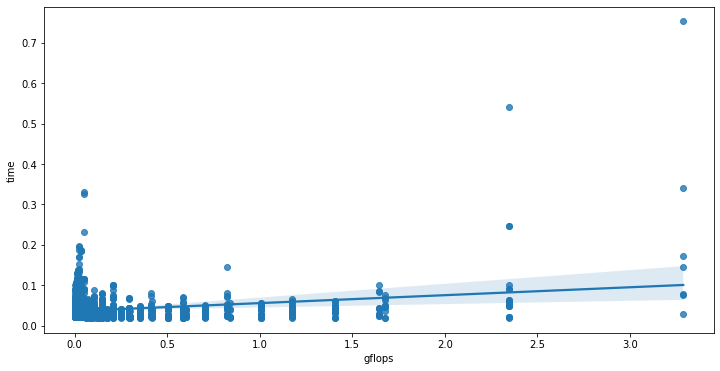

In [16]:
plt.figure(figsize=(12,6))
sns.regplot(x="gflops", y="time", data=paper_df)
plt.show()